In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import matplotlib.pyplot as plt  
from ipywidgets import interact

import torchio as tio 

#from MedicalDatasets import IRCAD
from data.IRCAD import IRCAD
from data.util import *

GET DATA

In [2]:
%%time

mount_dir = Path("/mnt/Shared/") if Path.exists(Path("/mnt/Shared/")) else Path.home() / "data"
root_data_dir = mount_dir / "3Dircadb1"

transforms = [
        tio.ToCanonical(),  # to RAS
        tio.Clamp(-150, 250),
        tio.RescaleIntensity(out_min_max=(-1, 1)),
        tio.Resample((1, 1, 2)),  # to 1 mm iso
        ]

dataset = IRCAD(
    root_data_dir,
    transform=tio.Compose(transforms),
    subset=5,
    download=False,
)

CPU times: user 19.1 ms, sys: 11.5 ms, total: 30.5 ms
Wall time: 45.1 ms


In [3]:
print('Number of subjects in dataset:', len(dataset))
#sample_subject = dataset[np.random.randint(0,len(dataset))]
sample_subject = dataset[0]
print('Keys in subject:', tuple(sample_subject.keys())) 
print('Shape of CT data:', sample_subject['ct'].shape) 
print('Orientation of CT data:', sample_subject['ct'].orientation) 

Number of subjects in dataset: 5
Keys in subject: ('ct', 'labels', 'liver', 'cancer')
Shape of CT data: (1, 292, 292, 104)
Orientation of CT data: ('R', 'A', 'S')


DISPLAY DATA

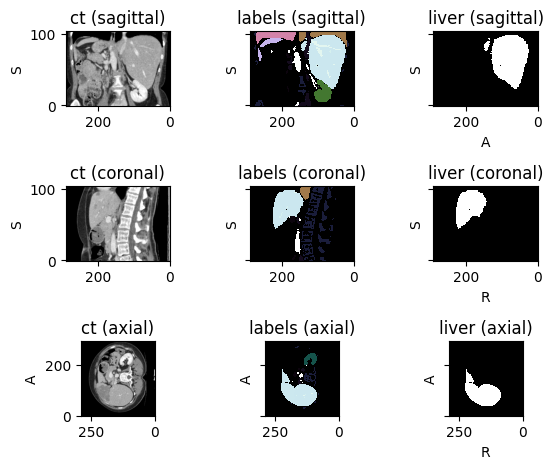

In [4]:
sample_subject.plot(radiological=True)

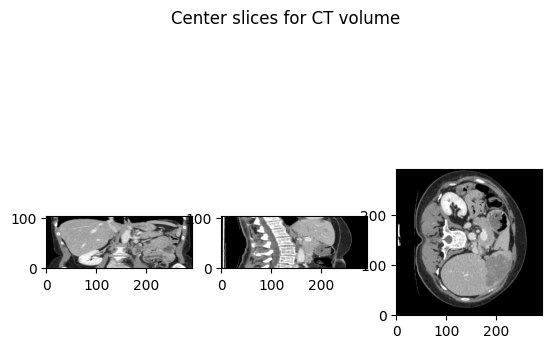

In [5]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
    
_, W, H, D = sample_subject['ct'].shape                                                                                                     
volume = sample_subject['ct'].data
slice_0 = volume[0, W//2, :, :]     # saggital (left to right) side
slice_1 = volume[0, :, H//2, :]     # coronal (anterior to posterior) frontal
slice_2 = volume[0,:, :, D//2]      # axial (superior to inferior) transversal

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for CT volume") 
plt.show()